In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.ticker as tkr
import datetime
import time

#%matplotlib qt 

import pickle

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn import preprocessing
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from tslearn.clustering import TimeSeriesKMeans

from sklearn.metrics import silhouette_samples, silhouette_score

# Load the Data

In [2]:
#Read all the customer data
file = open('load2.pkl','rb')
data = pickle.load(file)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,53222,53223,53224,53225,53226,53227,53228,53229,53230,53231
2014-01-01 00:00:00,0.0,0.000000,0.040009,4.089844,2.689453,6.691406,2.130859,1.959961,0.700195,6.679688,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 01:00:00,0.0,0.720215,0.049988,4.898438,2.099609,3.859375,2.119141,0.589844,0.419922,4.878906,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 02:00:00,0.0,0.560059,0.040009,5.570312,2.070312,2.060547,2.179688,0.500000,0.360107,4.558594,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 03:00:00,0.0,0.720215,0.049988,5.808594,1.910156,0.850098,2.470703,0.459961,0.320068,4.621094,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 04:00:00,0.0,0.720215,0.040009,5.011719,2.099609,1.679688,1.849609,0.500000,0.379883,4.539062,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
file = open('maalampo_load.pkl','rb')
maalampoLoad = pickle.load(file)
maalampoLoad.head()

,0,1,2,3,4,5,6,7,8,9,...,676,677,678,679,680,681,682,683,684,685
2014-01-01 00:00:00,0.0,1.54,3.59,0.75,0.09,1.58,NaN,2.35,4.22,2.74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 01:00:00,0.0,3.15,3.75,0.83,0.54,4.15,NaN,2.05,2.32,2.57,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 02:00:00,0.0,4.57,3.51,0.74,0.09,1.35,NaN,1.18,3.62,3.18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 03:00:00,0.0,1.26,1.32,1.04,0.35,4.45,NaN,1.50,3.04,3.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 04:00:00,0.0,1.26,1.25,0.78,0.30,1.40,NaN,1.76,2.86,2.88,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
file = open('load_tausta.pkl','rb')
maalampo = pickle.load(file)
maalampo.head()

,KPTUNNUS,PÄÄSULAKE,KÄYTTÄJÄRYHMÄ
0,0,3x63A,Rivitaloasunnot
60,1,3x80A,Pientaloasunnot
81,2,3x25A,Rivitaloasunnot
111,3,3x35A,Pientaloasunnot
140,4,3x35A,Pientaloasunnot


In [5]:
#Count of sulake types
Sulake = maalampo.groupby(['PÄÄSULAKE']).count()
Sulake

,KPTUNNUS,KÄYTTÄJÄRYHMÄ
PÄÄSULAKE,,
1x10A,3,3
1x16A,15,15
1x20A,31,31
1x25A,2145,2145
1x35A,3544,3544
3x100A,37,37
3x125A,6,6
3x160A,9,9
3x200A,4,4


In [6]:
maalampo.loc[maalampo['PÄÄSULAKE'] == '4x3x200A']

,KPTUNNUS,PÄÄSULAKE,KÄYTTÄJÄRYHMÄ
17046,10779,4x3x200A,Rivitaloasunnot


In [7]:
#Drop 4x3x200A from the data
maalampo.drop(maalampo[maalampo.PÄÄSULAKE == '4x3x200A'].index, inplace=True)
maalampo

,KPTUNNUS,PÄÄSULAKE,KÄYTTÄJÄRYHMÄ
0,0,3x63A,Rivitaloasunnot
60,1,3x80A,Pientaloasunnot
81,2,3x25A,Rivitaloasunnot
111,3,3x35A,Pientaloasunnot
140,4,3x35A,Pientaloasunnot
...,...,...,...
86746,53227,3x25A,Pientaloasunnot
86749,53228,3x25A,Pientaloasunnot
86750,53229,3x25A,Pientaloasunnot
86751,53230,3x25A,Pientaloasunnot


In [8]:
le = preprocessing.LabelEncoder()
maalampo['PÄÄSULAKE'] = maalampo.PÄÄSULAKE.astype(str)
categ = ['KÄYTTÄJÄRYHMÄ','PÄÄSULAKE']
maalampo[categ] = maalampo[categ].apply(le.fit_transform)
maalampo

,KPTUNNUS,PÄÄSULAKE,KÄYTTÄJÄRYHMÄ
0,0,13,2
60,1,14,1
81,2,10,2
111,3,11,1
140,4,11,1
...,...,...,...
86746,53227,10,1
86749,53228,10,1
86750,53229,10,1
86751,53230,10,1


In [9]:
#Load hourly temp data.
tempDF = pd.read_csv('Toutdoor_2014_1hour.csv')
tempDF.head()

,Year,m,d,Time,Time zone,Air temperature (degC)
0,2014,1,1,00:00,UTC,1.9
1,2014,1,1,01:00,UTC,2.2
2,2014,1,1,02:00,UTC,2.1
3,2014,1,1,03:00,UTC,1.8
4,2014,1,1,04:00,UTC,2.0


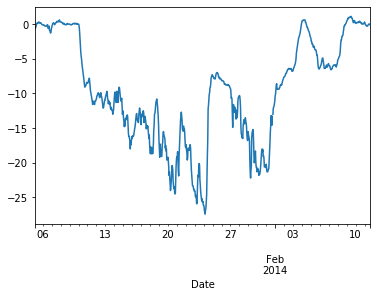

In [10]:
#Temp data date modification
cols=['Year','m','d','Time']
#tempDF['date'] = tempDF[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
tempDF['Date'] = pd.to_datetime(tempDF[['d','m','Year', 'Time']].astype(str).apply(' '.join, 1), format='%d %m %Y %H:%M')
tempDF = tempDF.set_index('Date')
tempDF.iloc[100:1000,5].plot()

In [11]:
#coldest hours
tempDF.sort_values(by=['Air temperature (degC)']).head(10)

,Year,m,d,Time,Time zone,Air temperature (degC)
Date,,,,,,
2014-01-24 04:00:00,2014,1,24,04:00,UTC,-27.4
2014-01-24 03:00:00,2014,1,24,03:00,UTC,-27.1
2014-01-24 02:00:00,2014,1,24,02:00,UTC,-26.9
2014-01-24 05:00:00,2014,1,24,05:00,UTC,-26.8
2014-01-24 06:00:00,2014,1,24,06:00,UTC,-26.6
2014-01-24 01:00:00,2014,1,24,01:00,UTC,-26.3
2014-01-24 00:00:00,2014,1,24,00:00,UTC,-26.1
2014-01-23 23:00:00,2014,1,23,23:00,UTC,-26.1
2014-01-23 05:00:00,2014,1,23,05:00,UTC,-25.9


In [12]:
# remove the customers with missing 0 values 
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'column_name': data.columns,
                                 'percent_missing': percent_missing})
non_zero_columns = missing_value_df.loc[missing_value_df[missing_value_df['percent_missing']<=0].index,'column_name'].values#.hist()
data_clean = data[non_zero_columns]

# remove large not residential customers whose annual energy consumption is larger than 60 000 kWh
Sum = data_clean.sum()
CustomersID = Sum[Sum<=60000].index
data_clean = data_clean.loc[:,CustomersID]
data_clean.shape

C:\Users\marpulli\Anaconda3\lib\site-packages\numpy\core\_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


(8760, 45070)

In [13]:
#data_clean.isnull().values.any()
data_clean.isnull().sum().sum()

0

Data downsampling and feature extraction
New file will have following load data PMAX,PMIN,PMEAN: 36 monthly columns, 156 weekly columns, 365*3 daily columns and 12 seasonal columns. Total 1302 columns.
Temperature data can be added with same time sampling if required.

In [14]:
#Change datatype to less memory consuming.
data = data_clean.astype(np.float32)

In [15]:
#Monthly downsampled data
def getMonthlyData():
    dataTr=pd.DataFrame()
    me = data.resample('M').mean().T
    ma = data.resample('M').max().T
    mi = data.resample('M').min().T
    #tt.T
    dataTr = pd.concat([dataTr, me], axis=1)
    dataTr = pd.concat([dataTr, ma], axis=1)
    dataTr = pd.concat([dataTr, mi], axis=1)
    return dataTr

#Weekly downsampled data
def getWeeklyData():
    dataTr=pd.DataFrame()
    me = data.resample('W').mean().T
    #ma = data.resample('W').max().T
    #mi = data.resample('W').min().T
    dataTr = pd.concat([dataTr, me], axis=1)
    #dataTr = pd.concat([dataTr, ma], axis=1)
    #dataTr = pd.concat([dataTr, mi], axis=1)
    return dataTr

#Daily downsampled data
def getDailyData():
    dataTr=pd.DataFrame()
    #me = data.resample('D').mean().T
    ma = data.resample('D').max().T
    #mi = data.resample('D').min().T
    dataTr = pd.concat([dataTr, me], axis=1)
    #dataTr = pd.concat([dataTr, ma], axis=1)
    #dataTr = pd.concat([dataTr, mi], axis=1)
    return dataTr

#Seasonal downsampled data
def getSeasonalData():
    dataTr=pd.DataFrame()
    spring1 = data.loc['2014-03-01':'2014-05-31'].mean()
    #summer1 = data.loc['2014-06-01':'2014-08-31'].mean()
    fall1 = data.loc['2014-09-01':'2014-11-30'].mean()
    mask = (((data.index >= '2014-12-1') & (data.index <= '2014-12-31')) | ((data.index >= '2014-1-1') & (data.index < '2014-2-28')))
    winter1 = data.loc[mask].mean()

    spring2 = data.loc['2014-03-01':'2014-05-31'].max()
    #summer2 = data.loc['2014-06-01':'2014-08-31'].max()
    fall2 = data.loc['2014-09-01':'2014-11-30'].max()
    mask = (((data.index >= '2014-12-1') & (data.index <= '2014-12-31')) | ((data.index >= '2014-1-1') & (data.index < '2014-2-28')))
    winter2 = data.loc[mask].max()

    spring3 = data.loc['2014-03-01':'2014-05-31'].min()
    #summer3 = data.loc['2014-06-01':'2014-08-31'].min()
    fall3 = data.loc['2014-09-01':'2014-11-30'].min()
    mask = (((data.index >= '2014-12-1') & (data.index <= '2014-12-31')) | ((data.index >= '2014-1-1') & (data.index < '2014-2-28')))
    winter3 = data.loc[mask].min()

    dataTr['SpringMean'] = spring1
    dataTr['SpringMax'] = spring2
    dataTr['SpringMin'] = spring3

    #dataTr['SummerMean'] = summer1
    #dataTr['SummerMax'] = summer2
    #dataTr['SummerMin'] = summer3

    dataTr['FallMean'] = fall1
    dataTr['FallMax'] = fall2
    dataTr['FallMin'] = fall3

    dataTr['WinterMean'] = winter1
    dataTr['WinterMax'] = winter2
    dataTr['WinterMin'] = winter3
    dataTr = dataTr.astype(np.float64)
    return dataTr

#take same hours from three different seasons
def getColdestNights():
    winter1 = data.loc['2014-01-20 00:00:00':'2014-01-20 6:00:00'].T
    winter2 = data.loc['2014-01-22 00:00:00':'2014-01-22 6:00:00'].T
    winter3 = data.loc['2014-01-23 00:00:00':'2014-01-23 6:00:00'].T
    winter4 = data.loc['2014-01-24 00:00:00':'2014-01-24 6:00:00'].T
    winter5 = data.loc['2014-01-29 00:00:00':'2014-01-29 6:00:00'].T
    coldNight = pd.concat([winter1,winter2,winter3,winter4,winter5], axis=1)
    return coldNight

def getColdPeriod():
    coldTimeLoad1 = data.loc['2014-01-20 00:00:00':'2014-01-24 23:00:00'].T
    coldTimeLoad2 = data.loc['2014-01-27 00:00:00':'2014-01-29 23:00:00'].T
    #coldTimeLoad = pd.concat([coldTimeLoad1,coldTimeLoad2],axis=1)
    coldTimeLoad = coldTimeLoad1
    return coldTimeLoad

def getColdPeriodRoll():
    roll_period = 7
    coldTimeLoad1 = data.loc['2014-01-20 00:00:00':'2014-01-24 23:00:00']
    coldTimeLoadRoll = coldTimeLoad1.rolling(roll_period).mean()
    return coldTimeLoadRoll.iloc[roll_period-1:,:]

def getColdPeriodTemp():
    coldTimeTemp = tempDF.loc['2014-01-20 00:00:00':'2014-01-24 23:00:00']
    return coldTimeTemp

In [ ]:
#Prepare the data, data engineering

#what data is needed
#dataTr = getWeeklyData() #getMonthlyData, getWeeklyData, getDailyData, getSeasonalData, getColdestNights
#dataTr = getSeasonalData()
dataTr = getColdestNights()

rows, columns = dataTr.shape

dataTr = dataTr[dataTr.iloc[:,0:columns].sum(axis=1) > 3]

dataTr['std'] = dataTr.std(axis=1)
dataTr['ave'] = dataTr.mean(axis=1)
dataTr['median'] = dataTr.median(axis=1)
dataTr['max'] = pow(dataTr.max(axis=1),2)
dataTr['min'] = pow(dataTr.min(axis=1),2)

rows, columns = dataTr.shape

#dataTr.drop(dataTr.columns[0:365], axis=1, inplace=True)
dataTr.drop(dataTr.columns[0:columns-5], axis=1, inplace=True)
dataTr

In [ ]:
#Get the week 20.1-24.1 data, all hours of cold period Weekend removed
dataTr = getColdPeriod()
dataTr = dataTr[dataTr.iloc[:,0:dataTr.shape[1]].sum(axis=1) > 3]
dataTr = dataTr[(dataTr < 15).all(1)] #remove outliers / 
dataTemp = getColdPeriodTemp()
dataTemp = dataTemp.T.iloc[5,:]
pd.DataFrame(dataTemp)

In [ ]:
#REMOVE
dataTemp = getColdPeriodTemp()
dataTemp = dataTemp.T.iloc[5,6:]
pd.DataFrame(dataTemp)

In [16]:
#Get the rolling mean data and temperature data for same period.
dataTr = getColdPeriodRoll().T
dataTr = dataTr[dataTr.iloc[:,0:dataTr.shape[1]].sum(axis=1) > 3]
dataTr = dataTr[(dataTr < 15).all(1)] #remove outliers / very high load multi-household customers  
#test = data.loc['2014-01-20 00:00:00':'2014-01-24 23:00:00'].T
dataTemp = getColdPeriodTemp()
dataTemp = dataTemp.T.iloc[5,6:]
pd.DataFrame(dataTemp)
dataTr

,2014-01-20 06:00:00,2014-01-20 07:00:00,2014-01-20 08:00:00,2014-01-20 09:00:00,2014-01-20 10:00:00,2014-01-20 11:00:00,2014-01-20 12:00:00,2014-01-20 13:00:00,2014-01-20 14:00:00,2014-01-20 15:00:00,...,2014-01-24 14:00:00,2014-01-24 15:00:00,2014-01-24 16:00:00,2014-01-24 17:00:00,2014-01-24 18:00:00,2014-01-24 19:00:00,2014-01-24 20:00:00,2014-01-24 21:00:00,2014-01-24 22:00:00,2014-01-24 23:00:00
2,0.044285,0.042860,0.042860,0.042860,0.042860,0.042860,0.044285,0.042860,0.042860,0.044285,...,0.044285,0.042860,0.044285,0.044285,0.044285,0.044285,0.042860,0.044285,0.044285,0.044285
3,9.867188,9.978795,10.332589,10.695312,10.866071,10.549107,10.077009,9.530134,9.190848,8.921875,...,9.507812,9.040179,8.457589,7.824777,7.151786,6.707031,6.141183,5.608817,6.010603,6.230469
4,3.337054,3.284319,3.258650,3.355748,3.630301,3.794364,3.787109,3.865792,3.898717,3.917132,...,4.529576,4.749442,4.981027,5.075335,5.119978,5.171317,5.225446,5.325893,5.165737,4.979911
5,2.615234,2.301060,1.975307,1.722517,1.475377,1.238351,0.929897,0.622768,0.564174,0.575614,...,3.482701,3.478237,3.413783,3.422433,3.649833,3.652902,3.724330,3.777344,4.720145,5.431083
6,3.479911,3.427176,3.502790,3.511440,3.412946,3.410156,3.472935,3.235770,3.284319,3.205915,...,3.829799,3.861049,3.712612,3.732701,3.808315,3.884208,3.991629,3.853237,3.711775,3.744420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52126,2.015765,1.837193,1.899972,2.354213,2.447126,2.713030,2.964704,3.433454,3.593331,3.426200,...,2.470424,2.670480,2.533203,2.437221,2.069964,1.981376,2.408552,2.130022,1.881348,1.928502
52127,1.165737,1.041399,0.865723,1.018555,1.214216,1.212681,1.069824,0.924107,1.056955,1.317034,...,2.315709,1.870047,1.851493,1.751465,1.557129,1.508580,1.335868,1.208775,1.240165,1.185896
52128,0.719936,1.040039,1.530134,2.047294,2.631487,3.198521,3.791155,4.271205,4.503906,4.398158,...,1.929967,1.901367,1.760045,1.807199,1.792969,1.665737,1.602679,1.635603,1.577079,1.491281
52129,0.995571,1.118478,1.144148,1.058489,1.169957,1.447021,1.539934,1.788504,1.998465,2.234235,...,2.110038,2.068604,1.940046,2.067174,2.150042,1.851353,1.292759,1.101353,1.084194,1.052769


In [17]:
#Max value of dataframe
dataTr.max().max()

14.995535714285714

In [18]:
#Check for NaN and remove rows with all low values.
#dataTr.isnull().values.any()
print(dataTr.isnull().sum().sum())

0


# Study the Data

In [19]:
#Add usergroup column to data
dataTr['Usergroup']=''
dataTr['MainFuse']=''
maalampo.set_index('KPTUNNUS',inplace=True)
dataTr['Usergroup'] = dataTr.index.map(maalampo['KÄYTTÄJÄRYHMÄ'])
dataTr['MainFuse'] = dataTr.index.map(maalampo['PÄÄSULAKE'])
dataTr.head(20)

,2014-01-20 06:00:00,2014-01-20 07:00:00,2014-01-20 08:00:00,2014-01-20 09:00:00,2014-01-20 10:00:00,2014-01-20 11:00:00,2014-01-20 12:00:00,2014-01-20 13:00:00,2014-01-20 14:00:00,2014-01-20 15:00:00,...,2014-01-24 16:00:00,2014-01-24 17:00:00,2014-01-24 18:00:00,2014-01-24 19:00:00,2014-01-24 20:00:00,2014-01-24 21:00:00,2014-01-24 22:00:00,2014-01-24 23:00:00,Usergroup,MainFuse
2,0.044285,0.042860,0.042860,0.042860,0.042860,0.042860,0.044285,0.042860,0.042860,0.044285,...,0.044285,0.044285,0.044285,0.044285,0.042860,0.044285,0.044285,0.044285,2,10
3,9.867188,9.978795,10.332589,10.695312,10.866071,10.549107,10.077009,9.530134,9.190848,8.921875,...,8.457589,7.824777,7.151786,6.707031,6.141183,5.608817,6.010603,6.230469,1,11
4,3.337054,3.284319,3.258650,3.355748,3.630301,3.794364,3.787109,3.865792,3.898717,3.917132,...,4.981027,5.075335,5.119978,5.171317,5.225446,5.325893,5.165737,4.979911,1,11
5,2.615234,2.301060,1.975307,1.722517,1.475377,1.238351,0.929897,0.622768,0.564174,0.575614,...,3.413783,3.422433,3.649833,3.652902,3.724330,3.777344,4.720145,5.431083,1,10
6,3.479911,3.427176,3.502790,3.511440,3.412946,3.410156,3.472935,3.235770,3.284319,3.205915,...,3.712612,3.732701,3.808315,3.884208,3.991629,3.853237,3.711775,3.744420,1,10
7,1.322893,1.419852,1.749721,2.094169,2.485910,2.794364,3.074219,3.442801,4.044364,4.170201,...,3.606306,3.836217,3.539062,3.497489,3.528739,3.404297,3.417132,3.298549,1,10
8,0.702846,0.944196,1.045689,1.034249,1.042829,1.051409,1.098563,1.085728,0.865792,0.808594,...,1.152832,1.244280,1.252790,1.349888,1.468471,1.559919,1.628488,1.495675,1,10
9,8.334821,8.931920,9.571429,9.657366,10.422991,10.582589,11.139509,12.420759,12.554688,11.943080,...,10.840402,12.435268,12.600446,12.329241,13.300223,12.917411,11.471540,11.422433,2,13
10,0.104283,0.141436,0.165728,0.182870,0.274327,0.302900,0.327183,0.332903,0.497175,0.604248,...,0.358538,0.384242,0.404262,0.474243,0.521380,0.552839,0.559989,0.565709,2,10
11,4.191964,4.377790,4.616071,5.364118,6.203962,6.501116,6.899554,6.926339,6.949219,6.872210,...,7.770089,7.498884,7.005022,6.693638,6.957589,7.229353,7.477679,7.683036,1,10


In [ ]:
datagroups = dataTr.groupby(['Usergroup']).mean()
datagroups

In [ ]:
datagroups = dataTr.groupby(['MainFuse']).mean()
datagroups

In [ ]:
dataTr.shape

In [ ]:
kerrostalo = dataTr[dataTr['Usergroup'] == 0]
pientalo = dataTr[dataTr['Usergroup'] == 1]
rivitalo = dataTr[dataTr['Usergroup'] == 2]
kerrostalo

In [ ]:
#fig = plt.figure(figsize=(10,10))
fig, (ax0,ax1,ax2) = plt.subplots(3,1)
ax0.plot(kerrostalo.iloc[:,0].T,lw=0.5)
ax1.plot(pientalo.iloc[:,0].T,lw=0.5)
ax2.plot(rivitalo.iloc[:,0].T,lw=0.5)
ax0.set_title('Kerrostalo')
ax1.set_title('Pientalo')
ax2.set_title('Rivitalo')
plt.suptitle('Standard Deviation', x=0.5,y=0,ha='center',va='bottom',fontsize=12)
fig.tight_layout()
plt.show()

In [ ]:
fig, (ax0,ax1,ax2) = plt.subplots(3,1)
ax0.plot(kerrostalo.iloc[:,1].T,lw=0.5)
ax1.plot(pientalo.iloc[:,1].T,lw=0.5)
ax2.plot(rivitalo.iloc[:,1].T,lw=0.5)
ax0.set_title('Kerrostalo')
ax1.set_title('Pientalo')
ax2.set_title('Rivitalo')
plt.suptitle('Average', x=0.5,y=0,ha='center',va='bottom',fontsize=12)
fig.tight_layout()
plt.show()

In [ ]:
fig, (ax0,ax1,ax2) = plt.subplots(3,1)
ax0.plot(kerrostalo.iloc[:,2].T,lw=0.5)
ax1.plot(pientalo.iloc[:,2].T,lw=0.5)
ax2.plot(rivitalo.iloc[:,2].T,lw=0.5)
ax0.set_title('Kerrostalo')
ax1.set_title('Pientalo')
ax2.set_title('Rivitalo')
plt.suptitle('Median', x=0.5,y=0,ha='center',va='bottom',fontsize=12)
fig.tight_layout()
plt.show()

In [ ]:
fig, (ax0,ax1,ax2) = plt.subplots(3,1)
ax0.plot(kerrostalo.iloc[:,3].T,lw=0.5)
ax1.plot(pientalo.iloc[:,3].T,lw=0.5)
ax2.plot(rivitalo.iloc[:,3].T,lw=0.5)
ax0.set_title('Kerrostalo')
ax1.set_title('Pientalo')
ax2.set_title('Rivitalo')
plt.suptitle('Maximum', x=0.5,y=0,ha='center',va='bottom',fontsize=12)
fig.tight_layout()
plt.show()

In [ ]:
fig, (ax0,ax1,ax2) = plt.subplots(3,1)
ax0.plot(kerrostalo.iloc[:,4].T,lw=0.5)
ax1.plot(pientalo.iloc[:,4].T,lw=0.5)
ax2.plot(rivitalo.iloc[:,4].T,lw=0.5)
ax0.set_title('Kerrostalo')
ax1.set_title('Pientalo')
ax2.set_title('Rivitalo')
plt.suptitle('Minimum', x=0.5,y=0,ha='center',va='bottom',fontsize=12)
fig.tight_layout()
plt.show()

In [ ]:
#Pairplot to see any correlation with usergroup. Coloring by usergroup
import seaborn as sns
sns.set_theme(style="ticks", palette='dark')
sns.pairplot(dataTr, hue='Usergroup',palette='dark')

In [ ]:
#Drop the columns with potentially no information or similar information
dataTr.drop(['ave','median','std'], axis=1, inplace=True)

In [ ]:
#Some cases float32 is required are figures are beyond float16 upper limit.
dataTr.iloc[:,0:dataTr.shape[1]-2].astype(np.float32)
dataTr.info()
#dataTr.sort_values(by=['max']).head(10)

In [ ]:
#NOT IN USE NOW. add temp data columns to cold night data
#coldNight = pd.Series([coldNight_T.iloc[2,5] for x in range(len(coldNight.index))])
coldNight['T1'] = coldNight_T.iloc[0,5]
coldNight['T2'] = coldNight_T.iloc[1,5]
coldNight['T3'] = coldNight_T.iloc[2,5]
coldNight['T4'] = coldNight_T.iloc[3,5]
coldNight['T5'] = coldNight_T.iloc[4,5]
coldNight['T6'] = coldNight_T.iloc[5,5]
coldNight['T7'] = coldNight_T.iloc[6,5]
coldNight

In [ ]:
#As seen from the below plot all the data is tightly packed. Let's use TSNE to find any similarities.
fig, ax = plt.subplots(figsize=(12,12))
#ax.set_xlim(0,200)
ax.scatter(dataTr.iloc[:,0],dataTr.iloc[:,190], s=0.4) #c is usergroup

In [ ]:
#Run if only pientalo data is used for TSNE
pientalo = dataTr[dataTr['Usergroup'] == 1]
pientalo

# Split the data, scaling/normalization and fit the model

In [20]:
dataTr.columns = [''] * len(dataTr.columns)
#Data suffle for train test sampling
r, c = dataTr.shape
num_of_rows = int(r * 0.75)

np.random.shuffle(dataTr.values) #shuffles data to make it random
train_data = dataTr.iloc[:num_of_rows,0:dataTr.shape[1]-2] #indexes rows for training data
test_data = dataTr.iloc[num_of_rows:,0:dataTr.shape[1]-2] #indexes rows for test data
train_data.shape

(32042, 114)

In [ ]:
train_data,dtype='object'

In [46]:
#Scaling / normalization
scaler = MinMaxScaler()
scaledData = pd.DataFrame(scaler.fit_transform(train_data))
scaledTestData = pd.DataFrame(scaler.fit_transform(test_data))
#normalizedData = pd.DataFrame(preprocessing.normalize(train_data, norm='l2', axis=1))
#normalizedTestData = pd.DataFrame(preprocessing.normalize(test_data, norm='l2', axis=1))
#normalizedData

In [61]:
#X_train = pd.DataFrame(train_data, dtype='object')
#X_train = pd.DataFrame(normalizedData, dtype='object') #If normalization is used.
X_train = pd.DataFrame(scaledData, dtype='object') #If scaling is used.
#X_test = test_data
#X_test = scaledTestData
#X_test = normalizedTestData

In [56]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32042 entries, 2 to 40267
Columns: 114 entries,  to 
dtypes: object(114)
memory usage: 28.1+ MB


In [ ]:
dataTemp.shape

# Timeseries DTW (without feature dimensionality reduction)

In [ ]:
pip install tslearn

In [ ]:
pip install yellowbrick

# Silhouette Score

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 11242 tasks  

0.719 --> 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 11242 tasks  

0.354 --> 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 11242 tasks  

0.337 --> 


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 11242 tasks  

0.352 --> 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 11242 tasks  

0.176 --> 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 11242 tasks  

0.170 --> 


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 11242 tasks  

0.246 --> 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 11242 tasks  

0.126 --> 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 11242 tasks  

0.123 --> 


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 11242 tasks  

0.196 --> 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 11242 tasks  

0.108 --> 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 11242 tasks  

0.105 --> 


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 11242 tasks  

0.165 --> 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 11242 tasks  

0.085 --> 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 11242 tasks  

0.084 --> 


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 11242 tasks  

0.140 --> 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 11242 tasks  

0.068 --> 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 11242 tasks  

0.067 --> 


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 11242 tasks  

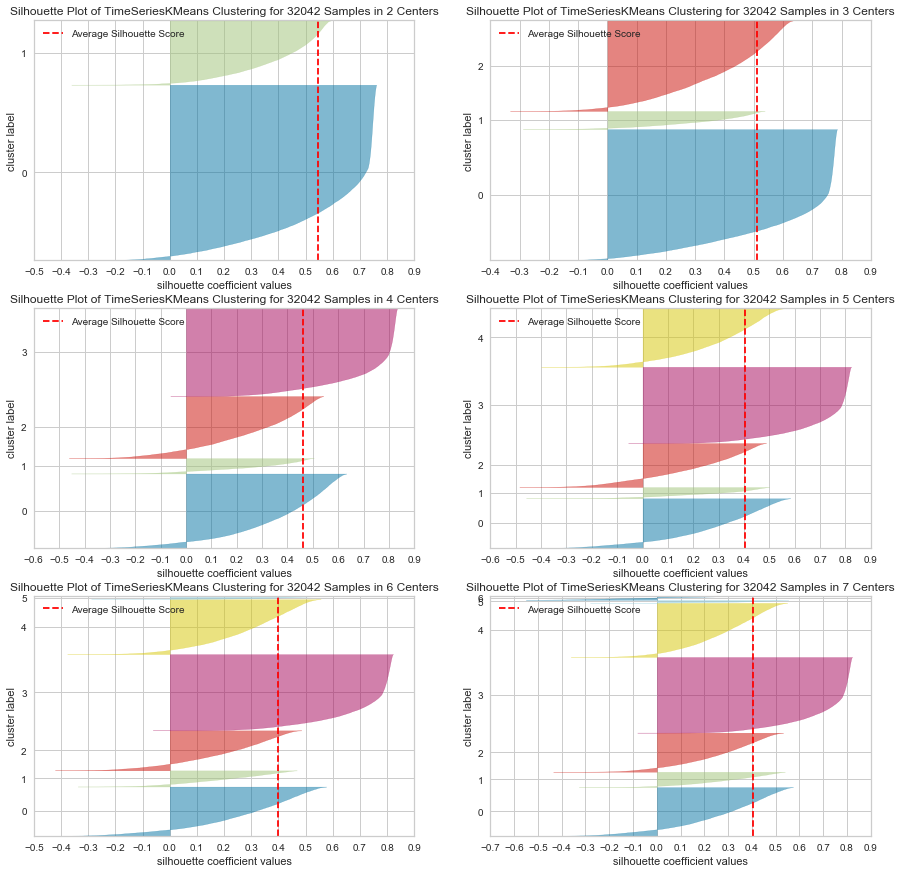

In [64]:
#Silhouette score for different cluster counts
from yellowbrick.cluster import SilhouetteVisualizer
inertias=[]
x = range(2,8,1)
fig, ax = plt.subplots(3, 2, figsize=(15,15))
for i in x:
    model = TimeSeriesKMeans(n_clusters= i, 
                         n_init=1, 
                         max_iter=3, 
                         metric='dtw', 
                         #max_iter_barycenter=2, 
                         random_state=24, 
                         n_jobs=-1, 
                         verbose=True)
    q, mod = divmod(i, 2)

    visualizer = SilhouetteVisualizer(model, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X_train)
    visualizer.finalize()
    inertias.append(model.inertia_)
    plt.savefig('122_Cold_hrs_DTW_SilhouetteScore.png')

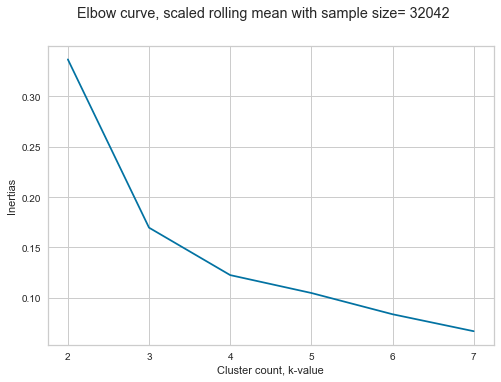

In [65]:
plt.plot(x, inertias)
plt.suptitle('Elbow curve, scaled rolling mean with sample size= %d' %X_train.shape[0])
plt.xlabel("Cluster count, k-value")
plt.ylabel("Inertias")
plt.savefig('122_Cold_hrs_DTW_RollScaElbowCurve.png')
plt.show()

234.372 --> 170.080 --> 162.770 --> 
145.460 --> 95.784 --> 95.220 --> 
115.501 --> 85.711 --> 81.901 --> 
92.039 --> 66.545 --> 64.575 --> 
72.759 --> 52.192 --> 51.870 --> 
70.780 --> 48.476 --> 47.567 --> 


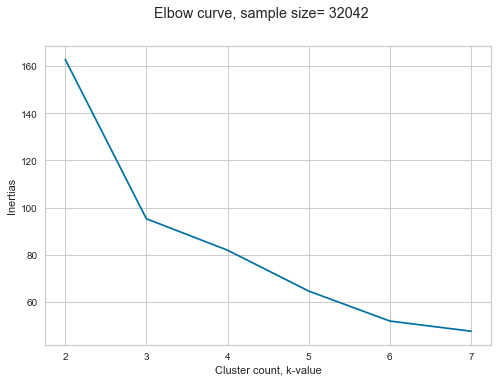

In [45]:
#elbow curve
inertias = []
for i in x:
    model = TimeSeriesKMeans(n_clusters= i, 
                         n_init=1, 
                         max_iter=3, 
                         metric='euclidean', 
                         #max_iter_barycenter=2, 
                         random_state=24, 
                         n_jobs=-1, 
                         verbose=True)
    model.fit(X_train)
    inertias.append(model.inertia_)
plt.plot(x, inertias)
plt.suptitle('Elbow curve, sample size= %d' %X_train.shape[0])
plt.xlabel("Cluster count, k-value")
plt.ylabel("Inertias")
plt.show()

For clusters = 2 The average silhouette_score is : 0.5447045076771666
For clusters = 3 The average silhouette_score is : 0.5140391753965151
For clusters = 4 The average silhouette_score is : 0.48556881058268997
For clusters = 5 The average silhouette_score is : 0.4134394373578175
For clusters = 6 The average silhouette_score is : 0.40581571267541555
Cluster silhouette score analysis in 18503.0442 seconds


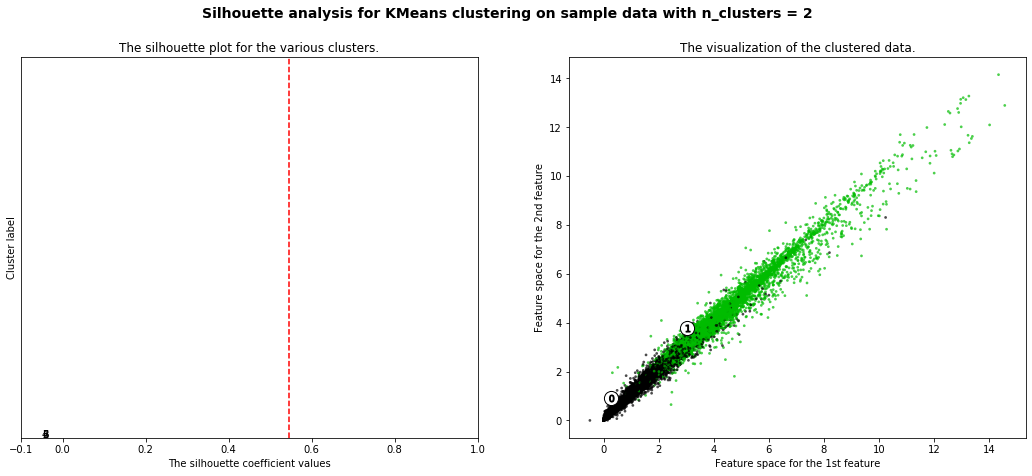

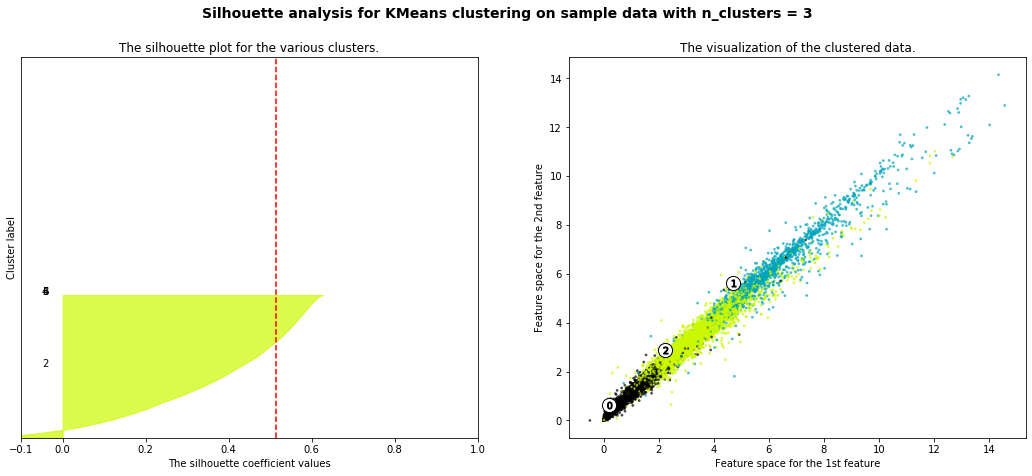

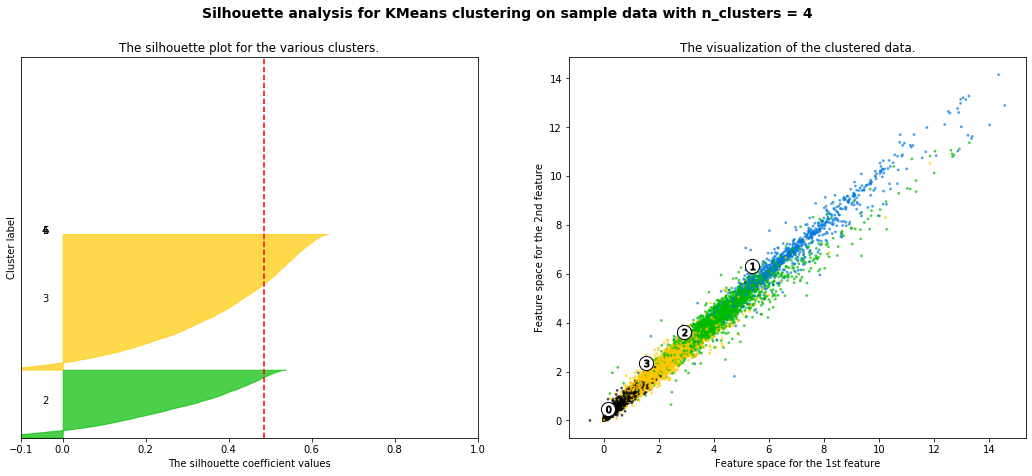

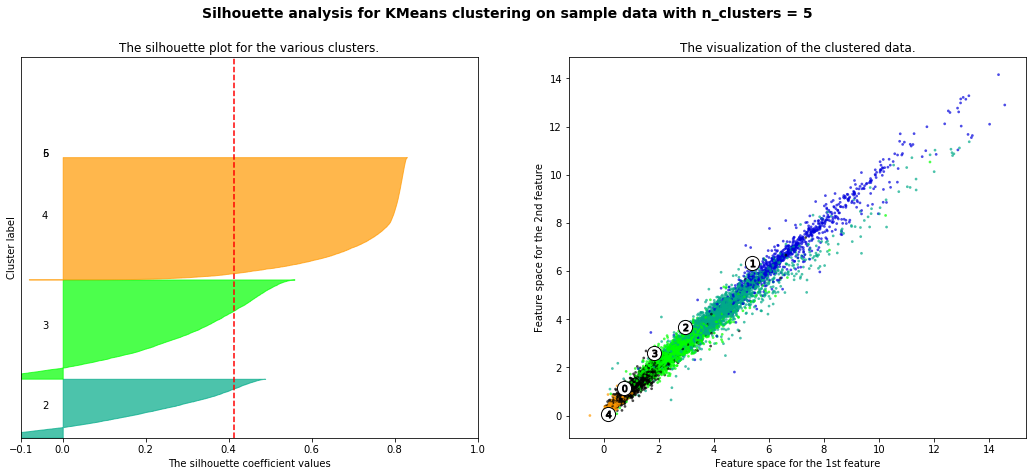

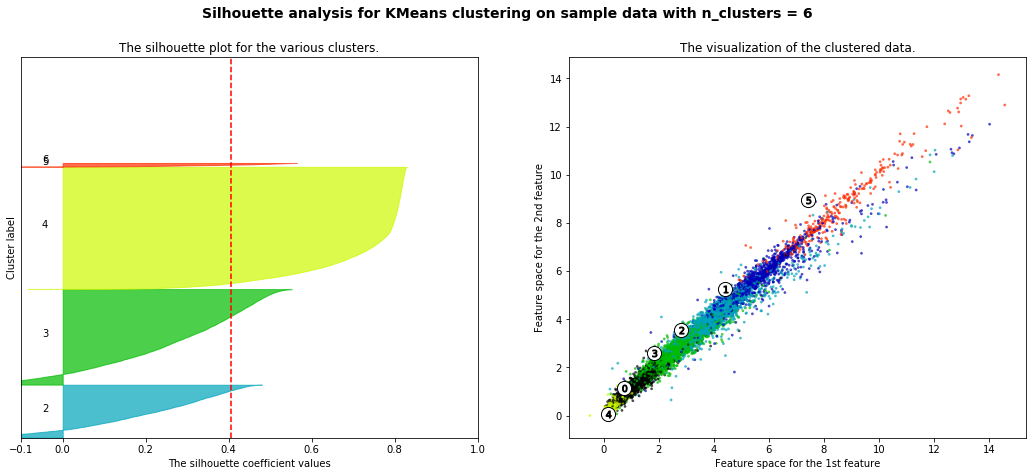

<Figure size 432x288 with 0 Axes>

In [24]:
#Silhouette score is other method to find optimal cluster count. Let's generate plots to find more details.
#X_train = train_data
x = range(2,7,1)
tic = time.perf_counter()
for n_clusters in x:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_train) + (n_clusters + 1) * 10])
    
    model = TimeSeriesKMeans(n_clusters = n_clusters,
                             n_init=1,
                             max_iter=3,
                             metric='dtw', 
                             random_state=24,
                             n_jobs=-1, 
                             verbose=False)
    cluster_labels = model.fit_predict(X_train)
    
    silhouette_avg = silhouette_score(X_train, cluster_labels)
    print(
        "For clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_train, cluster_labels)

    y_lower = 10
    for i in x:
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X_train.iloc[:, 0], X_train.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = model.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )
toc = time.perf_counter()
print(f"Cluster silhouette score analysis in {toc - tic:0.4f} seconds")

plt.show()  
plt.savefig('122_Cold_hrs_dtw_model_SilhouetteScore.png') 

# Final DTW Model

In [ ]:
pd.DataFrame(X_train)

In [ ]:
#Fit the timeseries cluster model
#DTW takes long time to process. From the experience the DTW is more accurate for timeseries clustering than euclidean.
sz = X_train.shape[1]
clusters = 3
seed = 0
np.random.seed(seed)
model = TimeSeriesKMeans(n_clusters= clusters, 
                         n_init=1, 
                         max_iter=4, 
                         metric='dtw', 
                         #max_iter_barycenter=2, 
                         random_state=24, 
                         n_jobs=-1, 
                         verbose=True)
%time model.fit(X_train)
#Save the model in pickle format.
filename = '122_Cold_hrs_dtw_model_3C.pkl'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
#Predict cluster ID
%time y_pred = model.predict(X_train)
y_pred

In [ ]:
#Cluster prediction sample counts, is outcome balanced?
values, counts = np.unique(y_pred, return_counts=True)
print(values,counts)
print(counts.sum())

In [ ]:
from tslearn.metrics import cdist_dtw
silhouette_score(X_train, y_pred)
#silhouette_score(X_train, y_pred, metric='euclidean')

In [ ]:
y_pred = model.predict(X_test)
from tslearn.metrics import cdist_dtw
silhouette_score(X_test, y_pred)

In [ ]:
#Convert train data to np array for plotting
npXt = np.array(X_train.iloc[1:600,:]) #for plotting purposes only first X customers shown. Chart is less saturated.
#npXt = X_train.iloc[1:600,:]
dataTemp = np.array(dataTemp)
#Plot the timeseries data with predicted cluster ID
clusters=4
fig, ax = plt.subplots(clusters,1)
plt.figure(figsize=(20,clusters*6))
for yi in range(clusters):
    ax = plt.subplot(clusters, 1, yi + 1)
    for xx in npXt[y_pred[1:600] == yi]:
        ax.plot(xx.ravel(), "k-", alpha=.2)
    ax.plot(model.cluster_centers_[yi].ravel(), "r-")
    ax2 = ax.twinx()
    ax2.plot(dataTemp.T, "y-")  
    #ax.set_xlim(0, sz)
    #plt.ylim(-0.2, 1.2)
    ax.set_xlabel('Hours')
    ax.set_ylabel('Load')
    ax2.set_ylabel('Temperature')
    plt.text(0.5, 0.95,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 0:
        plt.title("DTW Time Series")      
plt.savefig('122_Cold_hrs_dtw_model_4C.png')  

In [ ]:
#load the pickle model file
file = open("122_Cold_hrs_dtw_model_4C.pkl",'rb')
model = pickle.load(file)

In [ ]:
model.inertia_

In [ ]:
X_train

In [ ]:
#Add usergroup,mainfuse and cluster columns to all the training data. 
#This works only first time. Open the file again if you run more than once.
X_train['Usergroup']=''
X_train['MainFuse']=''
maalampo.set_index('KPTUNNUS',inplace=True)
X_train['Usergroup'] = X_train.index.map(maalampo['KÄYTTÄJÄRYHMÄ'])
X_train['MainFuse'] = X_train.index.map(maalampo['PÄÄSULAKE'])
X_train['Heating Cluster'] = clustering.labels_
X_train.head(20)

# TSNE

How about trying one usergroups only. Will it bring some insights about the data. kerrostalo, pientalo, rivitalo. Did not seem to have any visible impact on the results.

T-distributed Stochastic Neighbor Embedding.

t-SNE [1] is a tool to visualize high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data. t-SNE has a cost function that is not convex, i.e. with different initializations we can get different results.

It is highly recommended to use another dimensionality reduction method (e.g. PCA for dense data or TruncatedSVD for sparse data) to reduce the number of dimensions to a reasonable amount (e.g. 50) if the number of features is very high. This will suppress some noise and speed up the computation of pairwise distances between samples. For more tips see Laurens van der Maaten’s FAQ [2].

In [ ]:
#TSNE, non-linear dimensionality reduction algorithm. Works better than PCA (linear). PCA can be used as firts step.
tsne_data = TSNE(n_components=2, 
                 perplexity=90, #seems lower breaks to smaller clusters? 90 earlier value
                 n_iter=1000, 
                 early_exaggeration=8, 
                 learning_rate=500,
                 angle=0.9,
                 metric='l2',
                 #init='pca',
                 random_state=22,
                 n_jobs=-1,
                 verbose=1).fit_transform(principalComponents) 

In [ ]:
#TSNE 
plt.scatter(tsne_data[:,0], tsne_data[:,1], s=0.5)
plt.savefig('122_Cold_hrs_TSNE_.png')  

In [ ]:
sns.set_theme(style="ticks", palette='dark')
sns.pairplot(pd.DataFrame(tsne_data), palette='dark')

In [ ]:
#USE THIS if TSNE has three n_component output
#plt.scatter(principalComponents[:,1],principalComponents[:,5]) #Need to run clustering to get labels.
from mpl_toolkits.mplot3d import Axes3D
%matplotlib qt
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')
#ax.set_xlim(0,0.5)
#ax.set_ylim(0,0.5)
#ax.set_zlim(0,0.5)
ax.view_init(30, 80)
ax.scatter(tsne_data[:,0], tsne_data[:,1], tsne_data[:,2], s=0.5)
    
plt.show()

In [ ]:
#Not showing good performance. Can be used before TSNE if high dimensional data
pca = PCA(n_components=45)
principalComponents = pca.fit_transform(X_train)
print(pca.explained_variance_ratio_)
print('Cumulative ratio (0.95 is good goal!): %.2f' % pca.explained_variance_ratio_.sum())
plt.scatter(principalComponents[:,0], principalComponents[:,1], s=0.5)

In [ ]:
#normalizedData.iloc[0,[0,1,365,366,730,731]]
#plt.scatter(tsne_data.iloc[:,0], tsne_data.iloc[:,1], s=1)

# Model testing area

Fourier

In [ ]:
import matplotlib.pyplot as plt
import scipy
from scipy.fftpack import fftshift
import numpy as np

#x = np.arange(-3, 3, 0.01)
y = X_train.iloc[100,:]
#y[150:450] = 1
#plt.plot(x, y) # plot of the step function
y.plot()
yShift = fftshift(y) # shift of the step function
Fourier = scipy.fft(yShift) # Fourier transform of y implementing the FFT
Fourier = fftshift(Fourier) # inverse shift of the Fourier Transform
#plt.plot(Fourier) # plot of the Fourier transform
pd.DataFrame(Fourier).plot()

# nearestneighbor / DBSCAN

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html?highlight=nearestneighbors#sklearn.neighbors.NearestNeighbors.kneighbors

Very unstable, it is a challenge to find correct epsilon and min_sample values. Not able to split data to multiple clusters.

In [ ]:
#NearestNeighbors module to compute pointwise distances and find nearest neighbors
neigh = NearestNeighbors(n_neighbors=14, metric='euclidean', n_jobs=-1) #Experiment different values for optimal curve.
#nbrs = neigh.fit(normalizedData)
nbrs = neigh.fit(tsne_data)
#distances, indices = nbrs.kneighbors(normalizedData) #Find the K-neighbors of a point.
distances, indices = nbrs.kneighbors(tsne_data) #Find the K-neighbors of a point.

In [ ]:
# Plotting K-distance Graph. Can run only once, rerun above cell to run this.
%matplotlib qt
distances = np.sort(distances, axis=0)
distances = distances[:,1]
#plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=22)
plt.xlabel('Data Points sorted by distance',fontsize=16)
plt.ylabel('Epsilon',fontsize=16)
plt.show()

In [ ]:
#Clustering
from itertools import product
eps_values = np.arange(0.7,1.0,0.1) #Set eps range to find optimal
min_samples = np.arange(14,24,2) #Set required core point range to find optimal
DBSCAN_params = list(product(eps_values, min_samples))

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html?highlight=dbscan#sklearn.cluster.DBSCAN

In [ ]:
#Clustering
no_of_clusters = []
sil_score = []
#good_label =[]
for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1],metric='euclidean').fit(tsne_data)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    #print(DBS_clustering.labels_)
    print('%.1f' % p[0],p[1])#epsilon and min samples
    print(no_of_clusters) #adds latest cluster count to list
    if len(np.unique(DBS_clustering.labels_)) > 1:
        sil_score.append(silhouette_score(tsne_data, DBS_clustering.labels_))
        good_label = DBS_clustering.labels_
    else:
        sil_score.append(silhouette_score(tsne_data, good_label))    

In [ ]:
#Clustering
sns.set(style="ticks")
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters
pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

In [ ]:
#Clustering
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score
pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
ax.set_title('Silhouette score')
plt.show()

The distance metric to use. If a string, the distance function can be ‘braycurtis’, ‘canberra’, ‘chebyshev’, ‘cityblock’, ‘correlation’, ‘cosine’, ‘dice’, ‘euclidean’, ‘hamming’, ‘jaccard’, ‘jensenshannon’, ‘kulsinski’, ‘mahalanobis’, ‘matching’, ‘minkowski’, ‘rogerstanimoto’, ‘russellrao’, ‘seuclidean’, ‘sokalmichener’, ‘sokalsneath’, ‘sqeuclidean’, ‘wminkowski’, ‘yule’.

In [ ]:
#Clustering with optimal parameters
DBS_clustering = DBSCAN(eps=0.8, min_samples=26, metric='euclidean').fit(tsne_data)
#DBS_clustering = DBSCAN(eps=0.3, metric='cityblock', min_samples=10).fit(coldNight)
DBSCAN_clustered = pd.DataFrame(tsne_data.copy())
#DBSCAN_clustered = pd.DataFrame(coldNight.copy())

DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # append labels to points

In [ ]:
DBSCAN_clustered

In [ ]:
#Save the model in pickle format.
#model.to_pickle('dtw_model_6C.pkl')
filename = 'DBSCAN_model_C.pkl'
pickle.dump(DBS_clustering, open(filename, 'wb'))

In [ ]:
#Clustering, cluster sample count
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ['DBSCAN_size']
DBSCAN_clust_sizes

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
ax.scatter(tsne_data[:,0], tsne_data[:,1], c=DBSCAN_clustered['Cluster'], s=0.5)

Below cells do not work with DBSCAN (no cluster_centers)

In [ ]:
#Plot the timeseries data with predicted cluster ID. DOES NOT WORK WITH DBSCAN as no cluster center attribute.!!!!
clusters = 6
X_train = normalizedData
sz = X_train.shape[1]
X_train.columns = [''] * len(X_train.columns)
npXt = np.array(X_train.iloc[1:2500,:])

plt.figure(figsize=(20,20))
for yi in range(clusters):
    plt.subplot(clusters, 1, yi + 1)
    for xx in npXt[y_pred[1:2500] == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(DBS_clustering.core_sample_indices_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-0.1, 0.55)
    plt.xlabel('Hours')
    plt.ylabel('Load (scaled)')
    plt.text(0.5, 0.95,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 0:
        plt.title("DBA $k$-means")
    #Add temperature plot for same period.    
    #if yi == clusters-1: #this is to plot temp data at bottom
    #    #TrainT.reset_index(drop=True, inplace=True)
    #    plt.subplot(clusters+1, 1, yi+2)
    #    plt.xlim(0, sz)
    #    plt.ylabel('Temperature C')
    #    plt.plot(NightDataT.iloc[:,5])
plt.savefig('Resampled_KMEANS_Daily_5C.png')    

In [ ]:
idx = np.r_[0:1096]
X_train.drop(X_train.columns[idx], axis=1, inplace=True)
X_train['Target'] = y_pred
X_train

# KMEANS

KMEANS seem to balance cluster assignments very equally. This might not be correct assumption.

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, n_init=25, max_iter=500, tol=1e-5, algorithm='full', random_state=0).fit(tsne_data)

In [ ]:
kmeans.labels_
values, counts = np.unique(kmeans.labels_, return_counts=True)
print(values,counts)
print(counts.sum())

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
ax.scatter(tsne_data[:, 0], tsne_data[:, 1], c=kmeans.labels_, s=1)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="b", s=50)

In [ ]:
silhouette_score(tsne_data, kmeans.labels_, metric='euclidean')

In [ ]:
plt.savefig('tsneDailyMax_KMEANS_6C.png')   

In [ ]:
kmeans.cluster_centers_

#  AffinityPropagation

Takes lot of resources. I was not able to run this as it fails due to resource issue.

In [ ]:
from sklearn.cluster import AffinityPropagation
clustering = AffinityPropagation(random_state=5).fit(tsne_data)

In [ ]:
values, counts = np.unique(clustering.labels_, return_counts=True)
print(values,counts)
print(counts.sum())

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
ax.scatter(normalizedData.iloc[:, 0], normalizedData.iloc[:, 1], c=clustering.labels_, s=1)
ax.scatter(clustering.cluster_centers_[:, 0], clustering.cluster_centers_[:, 1], c="b", s=50)

# GaussianMixture

In [ ]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=4, covariance_type='spherical', max_iter = 600, random_state=0).fit(tsne_data)

In [ ]:
y_pred = gm.predict(tsne_data)
y_pred

In [ ]:
values, counts = np.unique(y_pred, return_counts=True)
print(values,counts)
print(counts.sum())

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
ax.scatter(tsne_data[:, 0], tsne_data[:, 1], c=y_pred, s=1)
#ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="b", s=50)

In [ ]:
silhouette_score(tsne_data, y_pred, metric='euclidean')

In [ ]:
plt.savefig('tsneDailyMax_gaussianM_6C.png')  

# Agglomerative Clustering.

Looks promising comparing to other algorithms.Requires better parameter tuning.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=4, 
                                     linkage='single',
                                     affinity='l2').fit(tsne_data)

In [ ]:
values, counts = np.unique(clustering.labels_, return_counts=True)
print(values,counts)
print(counts.sum())

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
#ax.scatter(tsne_data[:, 0], tsne_data[:, 1], c=clustering.labels_, s=1, cmap ='rainbow')
ax.scatter(X_train.iloc[:, 0], X_train.iloc[:, 6], c=clustering.labels_, s=0.5, cmap ='rainbow')
plt.savefig(122_Cold_hrs_Agglom_4C.png')

In [ ]:
#Silhouette scoresfor 3,4,5,6 cluster cases.
ac3 = AgglomerativeClustering(n_clusters=3)
ac4 = AgglomerativeClustering(n_clusters=4)
ac5 = AgglomerativeClustering(n_clusters=5)
ac6 = AgglomerativeClustering(n_clusters=6)

silhouette_scores = []
silhouette_scores.append(silhouette_score(tsne_data, ac3.fit_predict(tsne_data)))
silhouette_scores.append(silhouette_score(tsne_data, ac4.fit_predict(tsne_data)))
silhouette_scores.append(silhouette_score(tsne_data, ac5.fit_predict(tsne_data)))
silhouette_scores.append(silhouette_score(tsne_data, ac5.fit_predict(tsne_data)))

In [ ]:
silhouette_scores= silhouette_score(tsne_data, AgglomerativeClustering(n_clusters=4).fit_predict(tsne_data))
silhouette_scores

In [ ]:
#No need for this now
k = [3, 4, 5, 6]
fig, ax = plt.subplots(figsize=(8,8))
ax.bar(k, silhouette_scores)
ax.set_xlabel('Number of clusters', fontsize = 14)
ax.set_ylabel('S(i)', fontsize = 14)
plt.show()

# Add cluster assignments and usergroup to data

Have a look if cluster assigments make sense comparing to building type.

In [ ]:
#Add usergroup and cluster columns to all data. This works only first time. Open the file again if you run more than once.
dataTr['Usergroup']=''
maalampo.set_index('KPTUNNUS',inplace=True)
dataTr['Usergroup'] = dataTr.index.map(maalampo['KÄYTTÄJÄRYHMÄ'])
dataTr['Heating Cluster'] = clustering.labels_
dataTr.head(20)

In [ ]:
#IF ONLY pientalo DATA is USED.
#Add usergroup and cluster columns to pientalo data. This works only first time. Open the file again if you run more than once.
pientalo['Usergroup']=''
maalampo.set_index('KPTUNNUS',inplace=True)
pientalo['Usergroup'] = pientalo.index.map(maalampo['KÄYTTÄJÄRYHMÄ'])
pientalo['Heating Cluster'] = clustering.labels_
pientalo.head(20)

Usergroup: 0 = kerrostalo, 1 = pientalo, 2 = rivitalo 
Quick look: Does not seem very good results as kerrostalo (usergroup=0) has three different cluster assignments.

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
ax.set_xlim(0,200)
ax.scatter(dataTr.iloc[:,0],dataTr.iloc[:,2],c=dataTr.iloc[:,-1]) #c is usergroup